In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import os
import re

os.chdir('data/GSEA')

In [19]:
# Create dictionary for molecular function (MF), biological process (bp) and cellular component(cc) data
huntMFdict = {}
huntBPdict = {}
huntCCdict = {}
huntCPdict = {}
huntCGPdict = {}

# Initialize variables with the most appearance in the code
pValue = 'pValue'
geneSet = 'GeneSet'

# Read data from the files and classify them into MF, BP and CC each
for filename in os.listdir():
    if filename.startswith('huntMF'):
        keyName = re.findall(r'huntMFtop(\S*).txt', filename)[0]
        huntMFdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    if filename.startswith('huntBP'):
        keyName = re.findall(r'huntBPtop(\S*).txt', filename)[0]
        huntBPdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    if filename.startswith('huntCC'):
        keyName = re.findall(r'huntCCtop(\S*).txt', filename)[0]
        huntCCdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    if filename.startswith('huntCP'):
        keyName = re.findall(r'huntCPtop(\S*).txt', filename)[0]
        huntCPdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    if filename.startswith('huntCGP'):
        keyName = re.findall(r'huntCGPtop(\S*).txt', filename)[0]
        huntCGPdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]

colNames = list(huntMFdict.keys())
cpColNames = list(huntCPdict.keys())
cpFinColNames = ['GeneSet', '50', '100', '200', '400', '800', '1600', 'All']
finColNames = ['GeneSet', '25', '50', '100', '200', '400', '800', '1600', 'All']

In [5]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
huntBPs = colNames
huntBPDF = huntBPdict[huntBPs[0]]
for huntBP in huntBPs[1:]:
    huntBPDF = pd.merge(huntBPDF, huntBPdict[huntBP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
huntBPDF['# NaN'] = huntBPDF.isnull().sum(axis=1)
huntBPDF = huntBPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in huntBPDF['GeneSet']]
huntBPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    huntBPDF[colName] = [-(math.log(pvals, 10)) for pvals in huntBPDF[colName]]

huntBPDF = huntBPDF[finColNames]
huntBPDF

,GeneSet,25,50,100,200,400,800,1600,All
0,positive regulation of biosynthetic process,9.049635,12.782516,13.130768,15.000000,24.457175,34.203426,46.924453,89.462181
1,regulation of transcription from rna polymeras...,9.102923,12.869666,16.231362,15.151811,19.515700,36.754487,48.896196,71.602060
2,positive regulation of gene expression,10.581699,14.283162,14.498941,13.903090,24.616185,35.034798,46.237321,81.473661
3,tissue development,NaN,10.507240,13.744727,15.539102,21.239578,31.974694,44.886057,70.323306
4,positive regulation of transcription from rna ...,10.240332,14.388277,15.244888,14.903090,18.187755,29.774691,37.530178,NaN
5,immune system process,NaN,NaN,12.251812,17.804100,30.787812,55.379864,84.681937,133.970616
6,skeletal system development,21.542118,21.517126,20.732828,16.201349,22.151811,28.910095,NaN,NaN
7,anterior posterior pattern specification,15.167491,12.202732,14.271646,12.234331,15.343902,NaN,NaN,NaN
8,organ morphogenesis,8.000435,NaN,13.221849,13.821023,19.189767,31.385103,NaN,NaN
9,embryo development,15.657577,15.168770,16.244125,12.324222,15.801343,NaN,NaN,NaN


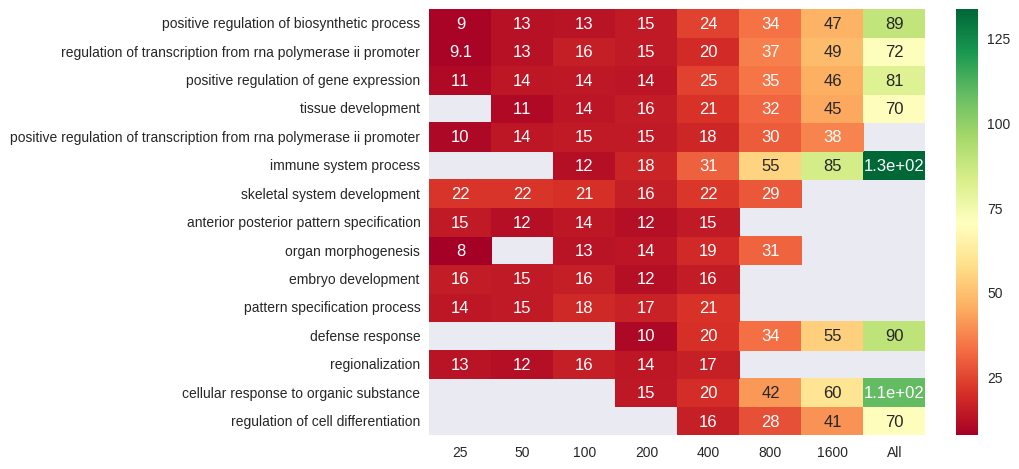

In [6]:
# Generate the heatmap of GSEA Biological Process
sns.heatmap(huntBPDF.ix[:, 1:], cmap="RdYlGn", annot=True, yticklabels=list(huntBPDF['GeneSet']))

In [7]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
huntCCs = colNames
huntCCDF = huntCCdict[huntCCs[0]]
for huntCC in huntCCs[1:]:
    huntCCDF = pd.merge(huntCCDF, huntCCdict[huntCC], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
huntCCDF['# NaN'] = huntCCDF.isnull().sum(axis=1)
huntCCDF = huntCCDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in huntCCDF['GeneSet']]
huntCCDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    huntCCDF[colName] = [-(math.log(pvals, 10)) for pvals in huntCCDF[colName]]

huntCCDF = huntCCDF[finColNames]
huntCCDF

,GeneSet,25,50,100,200,400,800,1600,All
0,transcription factor complex,4.705534,6.106793,5.642065,4.737549,7.282329,9.209012,NaN,NaN
1,intrinsic component of plasma membrane,NaN,NaN,3.995679,5.962574,8.210419,19.832683,41.012334,71.312471
2,extracellular space,NaN,NaN,3.397940,3.144481,6.899629,14.360514,27.793174,50.310691
3,endosome,NaN,NaN,NaN,4.987163,4.581699,11.472370,17.943095,32.158015
4,membrane region,NaN,NaN,NaN,4.576754,4.906578,12.389340,20.886057,39.528708
5,intracellular vesicle,NaN,NaN,NaN,4.638272,8.896196,12.774691,24.476254,42.204120
6,vacuolar part,NaN,NaN,NaN,5.607303,6.595166,15.369572,22.517126,31.696804
7,vacuole,NaN,NaN,NaN,7.653647,11.515700,21.301030,33.410050,52.464706
8,cytoskeleton,NaN,NaN,NaN,4.787812,6.326979,10.387216,17.050610,48.730487
9,proteinaceous extracellular matrix,NaN,NaN,4.100179,3.383000,5.578396,10.661544,15.578396,NaN


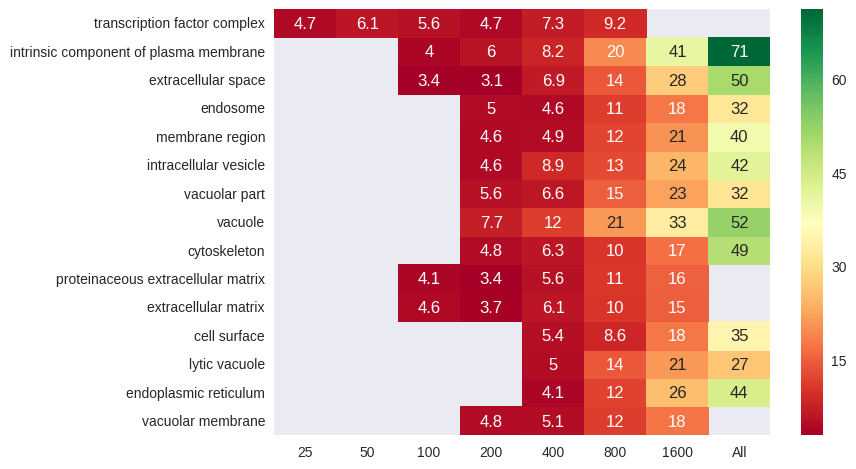

In [8]:
sns.heatmap(huntCCDF.ix[:, 1:], cmap="RdYlGn", annot=True, yticklabels=list(huntCCDF['GeneSet']))

In [9]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
huntMFs = colNames
huntMFDF = huntMFdict[huntMFs[0]]
for huntMF in huntMFs[1:]:
    huntMFDF = pd.merge(huntMFDF, huntMFdict[huntMF], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
huntMFDF['# NaN'] = huntMFDF.isnull().sum(axis=1)
huntMFDF = huntMFDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in huntMFDF['GeneSet']]
huntMFDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    huntMFDF[colName] = [-(math.log(pvals, 10)) for pvals in huntMFDF[colName]]

huntMFDF = huntMFDF[finColNames]
huntMFDF

,GeneSet,25,50,100,200,400,800,1600,All
0,sequence specific dna binding,18.318759,15.528708,18.477556,17.423659,21.850781,30.428291,32.866461,45.090979
1,rna polymerase ii transcription factor activit...,7.471083,10.278189,15.378824,16.607303,18.785156,29.195179,30.931814,38.754487
2,nucleic acid binding transcription factor acti...,8.118045,9.573489,13.737549,13.060481,19.335358,31.514279,34.627088,50.105684
3,double stranded dna binding,6.899629,6.978811,12.759451,10.892790,13.739929,21.655608,26.347754,36.931814
4,regulatory region nucleic acid binding,6.696804,7.876148,12.287350,10.365523,15.341989,24.023650,28.189096,40.179142
5,transcriptional activator activity rna polymer...,6.157391,8.801343,11.769551,13.072630,15.628932,23.798603,25.829738,34.095284
6,transcription factor activity rna polymerase i...,6.071092,8.665546,11.565431,11.630784,13.191789,21.186419,24.095284,33.486782
7,core promoter proximal region dna binding,5.809668,6.866461,10.943095,9.787812,12.157391,15.832683,19.229885,NaN
8,transcriptional activator activity rna polymer...,5.177832,8.340084,10.512862,10.151195,9.806875,16.256490,NaN,NaN
9,macromolecular complex binding,NaN,NaN,4.681937,5.838632,13.274905,21.634512,26.057000,53.578396


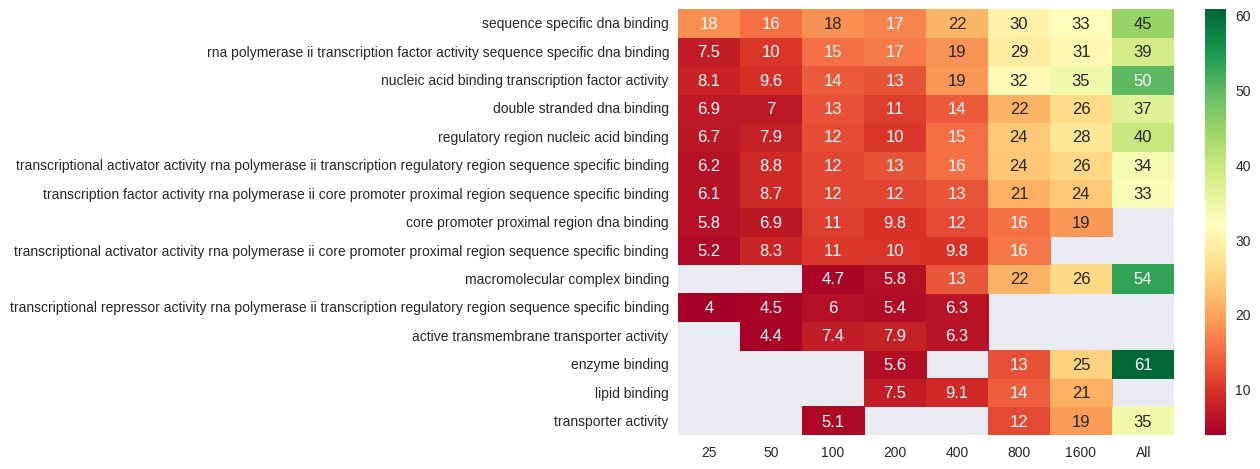

In [10]:
sns.heatmap(huntMFDF.ix[:, 1:], cmap="RdYlGn", annot=True, yticklabels=list(huntMFDF['GeneSet']))

In [20]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
huntCPs = cpColNames 
huntCPDF = huntCPdict[huntCPs[0]]
for huntCP in huntCPs[1:]:
    huntCPDF = pd.merge(huntCPDF, huntCPdict[huntCP], how='outer', on=geneSet)
    
# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
huntCPDF['# NaN'] = huntCPDF.isnull().sum(axis=1)
huntCPDF = huntCPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in huntCPDF['GeneSet']]
huntCPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in cpColNames:
    huntCPDF[colName] = [-(math.log(pvals, 10)) for pvals in huntCPDF[colName]]

huntCPDF = huntCPDF[cpFinColNames]
huntCPDF

,GeneSet,50,100,200,400,800,1600,All
0,reactome slc mediated transmembrane transport,3.886057,6.254925,5.406714,5.728158,9.313364,14.667562,13.031050
1,naba matrisome,3.982967,5.209715,5.071092,11.790485,21.793174,32.557520,38.089376
2,reactome toll receptor cascades,3.554396,NaN,5.231362,4.567031,6.798603,9.910095,15.343902
3,reactome transmembrane transport of small mole...,NaN,4.721246,3.749580,4.221126,9.259637,15.860121,17.690370
4,naba matrisome associated,NaN,3.889410,3.860121,7.962574,14.106238,22.249492,26.008774
5,kegg cytokine cytokine receptor interaction,NaN,3.705534,4.146302,3.774691,6.346787,11.856985,18.318759
6,reactome transport of glucose and other sugars...,NaN,4.510042,4.651695,4.300162,8.189096,8.447332,NaN
7,reactome innate immune system,NaN,NaN,4.027334,5.119758,9.752027,13.446117,20.809668
8,reactome immune system,NaN,NaN,4.258848,5.196543,10.397940,17.785156,40.154902
9,kegg leishmania infection,NaN,NaN,3.795880,NaN,9.281498,15.345823,18.752027


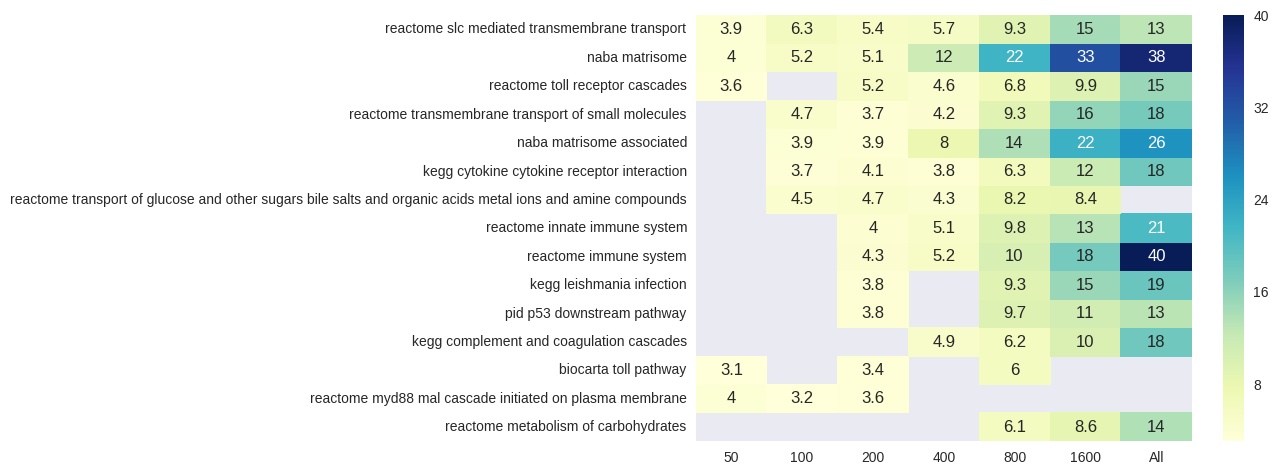

In [25]:
sns.heatmap(huntCPDF.ix[:, 1:], cmap="YlGnBu", annot=True, yticklabels=list(huntCPDF['GeneSet']))

In [23]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
huntCGPs = colNames
huntCGPDF = huntCGPdict[huntCGPs[0]]
for huntCGP in huntCGPs[1:]:
    huntCGPDF = pd.merge(huntCGPDF, huntCGPdict[huntCGP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
huntCGPDF['# NaN'] = huntCGPDF.isnull().sum(axis=1)
huntCGPDF = huntCGPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in huntCGPDF['GeneSet']]
huntCGPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    huntCGPDF[colName] = [-(math.log(pvals, 10)) for pvals in huntCGPDF[colName]]

huntCGPDF = huntCGPDF[finColNames]
huntCGPDF

,GeneSet,25,50,100,200,400,800,1600,All
0,smid breast cancer luminal b dn,4.924453,8.104025,11.171340,14.352617,25.385103,31.764472,39.341989,56.420216
1,benporath eed targets,10.002614,11.441291,13.657577,17.142668,18.935542,23.129596,31.304518,NaN
2,meissner brain hcp with h3k27me3,20.211832,19.653647,21.928118,22.312471,21.872895,23.181774,NaN,NaN
3,charafe breast cancer luminal vs basal dn,NaN,NaN,7.588380,11.714443,15.026410,30.869666,33.642065,50.432974
4,benporath suz12 targets,8.661544,10.339135,10.661544,13.638272,16.097997,NaN,32.183096,NaN
5,lindgren bladder cancer cluster 2b,NaN,NaN,NaN,10.534617,19.742321,32.060980,35.412289,51.185087
6,mclachlan dental caries up,NaN,NaN,NaN,14.524329,26.377786,45.602060,62.160522,70.341989
7,blalock alzheimers disease up,NaN,NaN,NaN,10.371611,22.841638,42.614394,64.617983,105.075204
8,wang mll targets,6.341989,9.096367,10.818156,10.057496,NaN,NaN,NaN,NaN
9,meissner npc hcp with h3k27me3,11.435334,9.552842,9.612610,10.716699,NaN,NaN,NaN,NaN


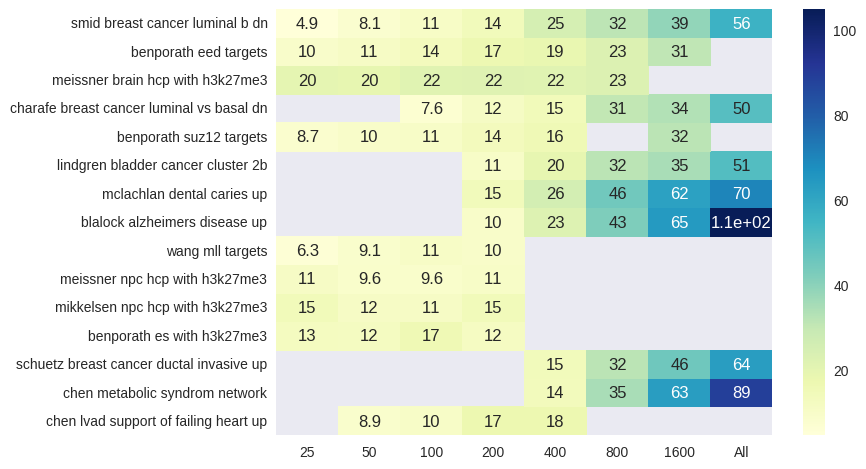

In [24]:
sns.heatmap(huntCGPDF.ix[:, 1:], cmap="YlGnBu", annot=True, yticklabels=list(huntCGPDF['GeneSet']))